<a href="https://colab.research.google.com/github/Said-Abdullahi/SIT744_PROJECT/blob/main/assignment_2_SIT744.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

o# SIT744 Assignment 2: Deep Learning Project 

<div class="alert-info">
    <p>Due: <strong>8:00pm 19 Sep 2022</strong>  (Monday)</p>

This is an <strong>individual</strong> assignment. It contributes <strong>40%</strong> to your final mark. Read the assignment instruction carefully.

<h2> What to submit </h2>

<p>
This assignment is to be completed individually and submitted to CloudDeakin. <strong>By the due date, you are required to submit the following files to the corresponding Assignment (Dropbox) in CloudDeakin</strong>:

<ol>
<li>	<strong>[YourID]_assignment2_solution.ipynb</strong>:  This is your Python notebook solution source file. </li>
<li>	<strong>[YourID]_assingment2_output.html</strong> or <strong>[YourID]_assingment2_output.pdf</strong>: This is the output of your Python notebook solution <emph>exported</emph> in HTML or PDF format.</li>
<li>	Extra files needed to complete your assignment, if any (e.g., images used in your answers).</li>
</ol>
</p>

<p>
For example, if your student ID is: 123456, you will then need to submit the following files:
<ul>
<li> 123456_assignment2_solution.ipynb </li>
<li> 123456_assignment2_output.html</li>
</ul>
</p>

<h2> Warning </h2>

Some components of this assignment may involve heavy computation that runs for a long duration. Please start early to avoid missing the assignment due date.

<h2> Marking criteria </h2>

<p>
Your submission will be assessed based on the overall impact of your effort. A useful model (or application) should be your focus. But as in Assignment 1, we will also consider the following criteria at the same time.

<ul>
<li> Showing good effort through completed tasks.</li>
<li> Applying deep learning theory to design suitable deep learning solutions for the tasks.</li>
<li> Critically evaluating and reflecting on the pros and cons of various design decisions.</li>
<li> Demonstrating creativity and resourcefulness in providing unique individual solutions.</li>
<li> Showing attention to detail through a good quality assignment report.</li>
</ul>
</p>


</div>

## Assignment objective

This assignment is to feedback on your learning in deep learning theory and its application to  data analytics or artificial intelligence problems.  

It builds on Assignment 1 but requires a higher level of mastery of deep learning theory and programming/engineering skills. In particular, you will practice making design decisions yourself. You are also likely to encounter practical issues that will help you consolidate textbook learning. 

## **Task 1 (P Task) Smart Recycling using Deep Learning**


**Task 1.1 Define a problem
Define an image classification problem that may help people better recycle, particularly by reducing contamination.** 

**Answer:** Contamination is a big problem. Contamination happens when non recycable items are placed in the recycling bin. To help people better recycle an image classification model and application will be developed. Imagine a resident can upload a picture of the item and the application will tell them whether it is recycable. For example Darebin city council resource revery centre get number of phone calls on a daily basis asking whether an item is recyclable or not. Not all city council recycle everything that is recycable. I live in Darebin region. My council does not recycle paper and plastic items. I gave Darebin City Council a call asking if they recycle items. It says that they do not recycle cardboard on their website but that is not the case. They do recycle cardboard. I also asked if they recycle paper and plastic but unfortunately they do not.

**Describe the desired inputs and outputs, including the target classes.**

**Answer:** What are the inputs: This image classification is a binary classification problem. Our **inputs will be all the images of the trash/non-recycable items and recycable items.** The **output** will be the **recycable items.** and **non-recycable**. There is **two outputs** posibilities. 

Why we choose a binary classification for this problem is that the residents are interested in knowing whether the item they have is recycable or not recycable before they bring it into Darebin Resource Recovery Centre (DRRC).

Source: https://www.darebin.vic.gov.au/Waste-and-environment/Resource-Recovery-Centre-Tip/Dropping-off-items/What-we-do-and-dont-accept

**Task 1.2 Make a plan**

**What dataset can you use to develop a deep learning solution?**

Our audience will be the Darebin region residence/household therefore we need to think what waste they produce. How will the images look like in household setting? Images taken with smarthphones?

**How many images do you need?**
We will be using a dataset trashnet from github. The dataset contains six categories: glass, paper, cardboard, plastic, metal, and trash. The dataset consists of 2527 images. There is 501 glass images, 594 paper images, 403 cardboard images, 482 plastic images, 410 metal images, and 137 trash images.

Source: https://github.com/garythung/trashnet

We will follow Darebin Resource Recovery Centre recycable guidelines. From the dataset the **recycable** are **glass, cardboard, and metal**. The **non-recycable** are **paper, plastic, and trash images.**

**How many for training? How many for testing?**
The dataset consists of 2527 images. The training and test split. The training dataset, validation dataset, and test dataset. Training dataset will consists of 2046 images, validation dataset is 228 and the test dataset will consists of 253 images.

**Do you need to label the images yourself?**

The folders are labeled but the images themselves are not labeled. We are going to label the dataset recycable for glass, cardboard, and metal images. We will label non-recycable for paper, plastic, and trash images and recycable for the other images. 

**How do you determine if your model is good enough?**
The accurracy will help us determine if our model is good enough. The question will be how much accuracy will we say is good enough. We think that an accuracy of 80% - 90% to be an good enough model.












## **Task 1.3 Implement a solution**
Collect relevant data. Develop a deep learning model. Report the model performance against the success criteria that you define.

In [ ]:
#Upload google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import and load packages
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense, Dropout



from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras.utils import image_dataset_from_directory
from keras.layers import BatchNormalization

**UNZIP**

In [ ]:
#unzip file in colaboratory
!unzip -q "/content/drive/MyDrive/data_split.zip"

**LOAD DATASET**

In [ ]:
#image size
IMG_SIZE=(180, 180)
#batch size
BATCH_SIZE=32

#data folder directories
train="/content/data_split/train"
test="/content/data_split/test"
valid="/content/data_split/validation"

In [ ]:
#Function for the loading the dataset
def get_dataset(path):
    '''
    loads the .jpg data from a folder path transforms the input data and returns tf.data.dataset for
    training ,validation and testing .
    '''


#load that from directories  
    dataset = image_dataset_from_directory(
        path,
        image_size=IMG_SIZE,
        shuffle=True,
        
        batch_size=BATCH_SIZE)



    # Return the training and test sets
    return dataset

#Get the dataset from the directory    
train_dataset=get_dataset(train)
validation_dataset =get_dataset(valid)
test_dataset=get_dataset(test)

Found 2046 files belonging to 2 classes.
Found 228 files belonging to 2 classes.
Found 253 files belonging to 2 classes.


In [ ]:
#The name of the classes
class_names = train_dataset.class_names
print(class_names)

['no_recycle', 'recycle']


**VISUALISE DATASET**

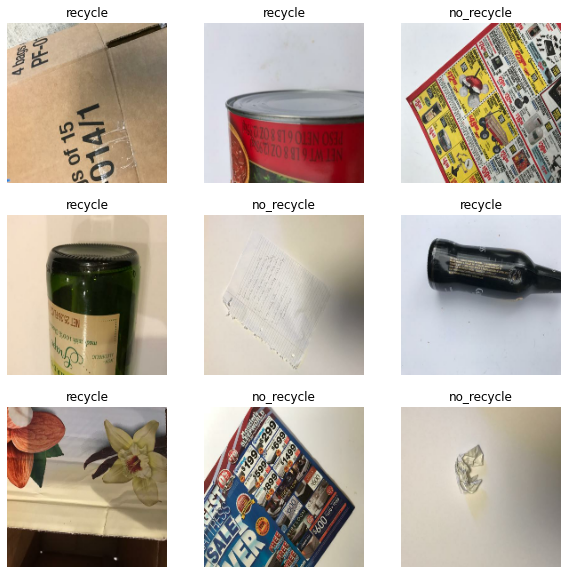

In [ ]:
#Images in the folder

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#We can see 9 images with their label from the training dataset

In [ ]:
#The data shapes
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


**Create model from keras.applications RESNET50 - Transfer Learning**

In [ ]:
#Create pretrained model
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                    input_shape=(180,180,3),
                    pooling='avg',classes=2,
                    weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(632, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))

#shows models structure
resnet_model.summary()

# We have a total parameters of 24,883,313, with 1,295,601 trainable parameters.
#I have used tuner finding out the 632 units and rmsprop are the best 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 632)               1294968   
                                                                 
 dense_1 (Dense)             (None, 1)                 633       
                                                                 
Total params: 24,883,313
Trainable params: 1,295,601
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
#Compile the model
resnet_model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

#Our project is binary image classification problem therefore,
#we use a loss of binary_crossentropy with the optimizer being rmsprop

In [ ]:
#Run the model
epochs=30
history = resnet_model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs
)

Epoch 1/30
64/64 [==============================] - 9s 71ms/step - loss: 0.8625 - accuracy: 0.7517 - val_loss: 0.2867 - val_accuracy: 0.8816
Epoch 2/30
64/64 [==============================] - 4s 55ms/step - loss: 0.3126 - accuracy: 0.8583 - val_loss: 0.2493 - val_accuracy: 0.8860
Epoch 3/30
64/64 [==============================] - 4s 55ms/step - loss: 0.2451 - accuracy: 0.8983 - val_loss: 0.2268 - val_accuracy: 0.8947
Epoch 4/30
64/64 [==============================] - 4s 54ms/step - loss: 0.1685 - accuracy: 0.9316 - val_loss: 0.3039 - val_accuracy: 0.9167
Epoch 5/30
64/64 [==============================] - 4s 53ms/step - loss: 0.1233 - accuracy: 0.9550 - val_loss: 0.2225 - val_accuracy: 0.9167
Epoch 6/30
64/64 [==============================] - 4s 55ms/step - loss: 0.0893 - accuracy: 0.9677 - val_loss: 0.2216 - val_accuracy: 0.9474
Epoch 7/30
64/64 [==============================] - 4s 55ms/step - loss: 0.0813 - accuracy: 0.9702 - val_loss: 0.2801 - val_accuracy: 0.9386
Epoch 8/30
64

**VISUALISE: training and validation accuracy and loss**

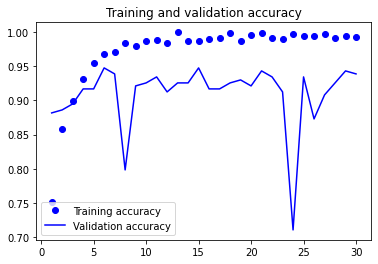

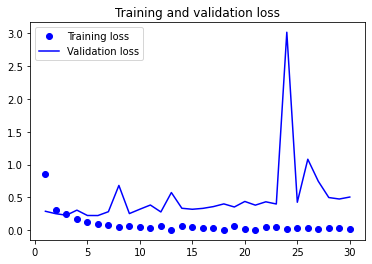

In [ ]:
#training and validation accuracy and loss
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()


#We can the see that the model is overfitting after the 4 or 5 epochs and data 
#augmentation should improve our model. 


**Evaluate the model**

In [ ]:
#Use the model on the test data and evaluate without augmentation
test_loss, test_acc = resnet_model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.2f}")

8/8 [==============================] - 1s 70ms/step - loss: 0.5077 - accuracy: 0.9130
Test accuracy: 0.91


**Answer:** The success criteria we defined in our plan was 80%-90%. The model performance usine pretrained resnet50 model gives an test accuracy above our succes criteria.

## **Task 2 (C Task) Analyse and improve the model**

### Task 2.1 Build an input pipeline for data augmentation


Build a data preprocessing pipeline to perform data augmentation. (You may use Keras ImageDataGenerator or write your own transformations.)

- Report the model performance with the pipeline added. How much performance gain have you achieved?    

- Profile your input pipeline to identify the most time-consuming operation. What actions have you taken to address that slow operation? (*Hint: You may use a profiler such as the [TensorFlow Profiler](https://github.com/tensorflow/profiler).*)



In [ ]:
#Test the model on the test datadata_augmentation = keras.Sequential(
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

model=Sequential()
#add data augmentation
model.add(data_augmentation)

#add res50 conv base 
model.add(pretrained_model)
model.add(BatchNormalization())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(632))


model.add(Dense(1,activation="sigmoid"))
#build the model
model.build(input_shape=(None, 180, 180, 3))
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

#Model structure
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 632)              

In [ ]:
# Train the model
epochs=30
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs
)

Epoch 1/30
64/64 [==============================] - 9s 78ms/step - loss: 1.2441 - accuracy: 0.7713 - val_loss: 0.4019 - val_accuracy: 0.8772
Epoch 2/30
64/64 [==============================] - 4s 63ms/step - loss: 0.5270 - accuracy: 0.8436 - val_loss: 0.3644 - val_accuracy: 0.8553
Epoch 3/30
64/64 [==============================] - 4s 62ms/step - loss: 0.3422 - accuracy: 0.8583 - val_loss: 0.2735 - val_accuracy: 0.8772
Epoch 4/30
64/64 [==============================] - 4s 63ms/step - loss: 0.3112 - accuracy: 0.8656 - val_loss: 0.2936 - val_accuracy: 0.8640
Epoch 5/30
64/64 [==============================] - 4s 63ms/step - loss: 0.2847 - accuracy: 0.8827 - val_loss: 0.2517 - val_accuracy: 0.8904
Epoch 6/30
64/64 [==============================] - 4s 62ms/step - loss: 0.2858 - accuracy: 0.8822 - val_loss: 0.2750 - val_accuracy: 0.8640
Epoch 7/30
64/64 [==============================] - 4s 62ms/step - loss: 0.2605 - accuracy: 0.8866 - val_loss: 0.2863 - val_accuracy: 0.8684
Epoch 8/30
64

**VISUALISE: training and validation accuracy and loss**

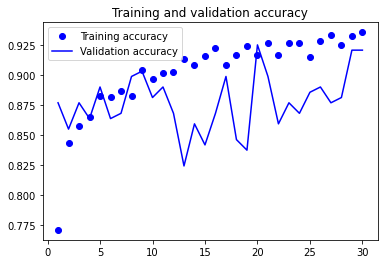

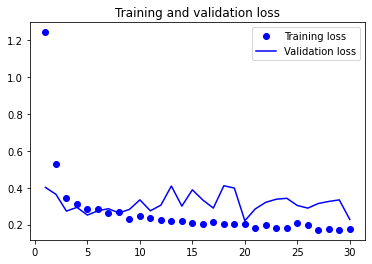

In [ ]:
#training and validation accuracy and loss for the data augumented
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#The graph shows that there is some improvement after data
# auguments and batch normalisation. 

**Evaluate the model**

In [ ]:
#Use the model on the test data and evaluate with augmentation
test_loss, test_acc = model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.2f}")

8/8 [==============================] - 1s 46ms/step - loss: 0.3454 - accuracy: 0.8814
Test accuracy: 0.88


**Answer:** Again given our success criteria we the model is performing well. However it less than without the data augumentation.

**Tensorboard Profiler**

In [ ]:
#Import
from datetime import datetime
from packaging import version

import os

The TensorFlow Profiler requires the latest versions of TensorFlow and TensorBoard (>=2.2).

In [ ]:
!pip install -U tensorboard_plugin_profile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Create a TensorBoard callback
logs = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")

tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 1,
                                                 profile_batch = '500,520')

model.fit(train_dataset,
          epochs=2,
          validation_data=validation_dataset,
          callbacks = [tboard_callback])

Epoch 1/2
64/64 [==============================] - 10s 154ms/step - loss: 0.1971 - accuracy: 0.9272 - val_loss: 0.3542 - val_accuracy: 0.9079
Epoch 2/2
64/64 [==============================] - 9s 134ms/step - loss: 0.1752 - accuracy: 0.9316 - val_loss: 0.3580 - val_accuracy: 0.8991


In [ ]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [ ]:
# Launch TensorBoard and navigate to the Profile tab to view performance profile
%tensorboard --logdir=logs

**Answer:** profile is indicated the compute device and input is taken the longest. We can improve input time.

### Task 2.2 Compare the performance under equal training time

You may notice that with your pipeline, the model performance improves, but at the cost of a longer training time per epoch. Is the additional training time well spent? Compare the dynamic of model performance (e.g., classification accuracy on the test data) with and without data augmentation, when equal training time is spent in the two scenarios. 

**Evaluate test data on model without the data augmentation**

In [ ]:
#Use the model on the test data and evaluate without augmentation
test_loss, test_acc = resnet_model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.2f}")

8/8 [==============================] - 1s 46ms/step - loss: 0.5077 - accuracy: 0.9130
Test accuracy: 0.91


**Evaluate test data on model with the data augmentation**

In [ ]:
#Use the model on the test data and evaluate with data augmentation
test_loss, test_acc = model.evaluate(test_dataset) 
print(f"Test accuracy: {test_acc:.2f}")

8/8 [==============================] - 0s 44ms/step - loss: 0.3454 - accuracy: 0.8814
Test accuracy: 0.88


**Answer:** We can still use the first model before augmentation because it performs better. However, better fine tuning and using more data augmentation the second model could be improvement more with longer training time per epoch.


### Task 2.3 Identifying model strength and weakness

Identify images that are incorrectly classified by your model. Do they share something in common? How do you plan to improve the model's performance on those images? 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Text(0.5, 1.0, 'recycle')

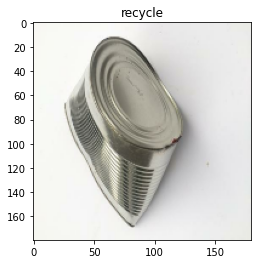

In [ ]:
#predicting the test data
predictions = resnet_model.predict(test_dataset)
predictions = np.argmax(predictions, axis=1)
print(predictions)

#take a single image from the test dataset
for images, labels in test_dataset.take(1):
    img = images[0].numpy().astype("uint8")
    label = labels[0].numpy()
plt.imshow(img)
plt.title(class_names[label])

#We get mmmisclassified images sometimes. I have looked at few by running the code a few times.

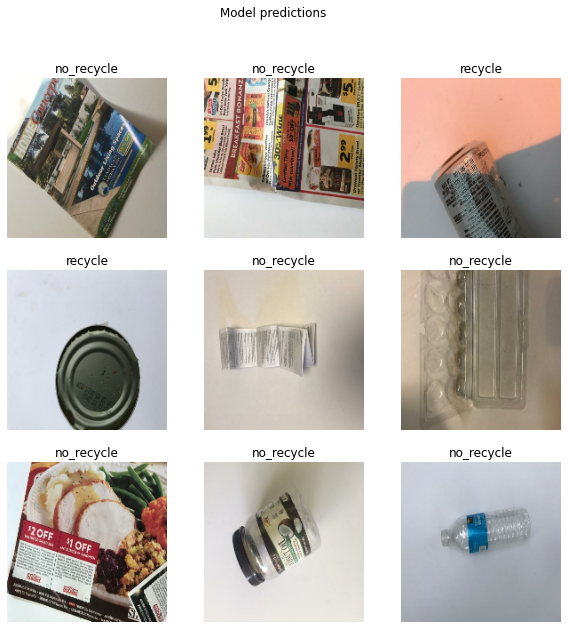

In [ ]:
#show a [pred from the test dataset
for image_batch, labels_batch in test_dataset.take(1):
    images = image_batch.numpy()
    labels = labels_batch.numpy()
    predictions = model.predict_on_batch(image_batch).flatten()

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    _ = plt.suptitle("Model predictions ")

**Answer:** The misclassified images have somethings in common. They have the contrast and brightness is different from the other images

## **Task 3 (D Task) Improve model generalisability across domains**

So far, you have used training and test images from the same source (via random data split). Now collect new test images from a different source. For example, you may take some photos yourself if you used downloaded images before.
Otherwise, you may take new photos using a different mobile phone or against a different background.

Show sample images from the original test data and the newly collected test data. In what ways are they different?

Feed the new test data into your model. Report the performance change.

Improve your model so that it generalises better on unseen test images.


**VISUALE ORIGINAL TEST DATA**

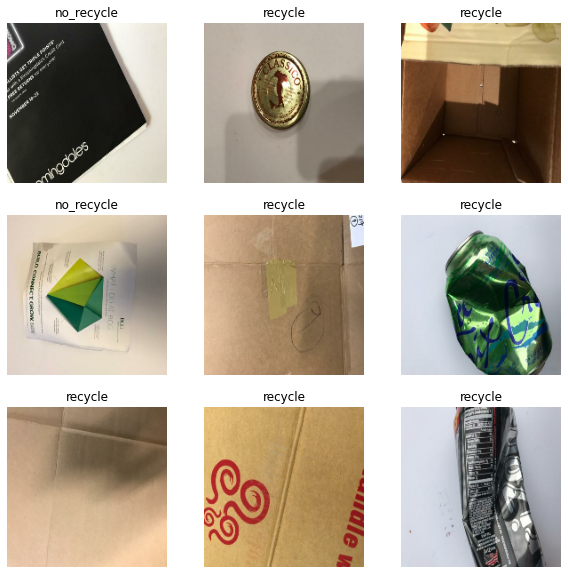

In [ ]:
#Images in the folder

plt.figure(figsize=(10, 10))
for images, labels in test_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#We can see 9 images with their label from the test dataset

**UPLOAD NEW TEST DATA**

Source: https://www.kaggle.com/datasets/arkadiyhacks/drinking-waste-classification

We creating the new dataset half of the data comes from the above source and half was taken with my iphone at home.

In [ ]:
#unzip file in colaboratory
!unzip -q "/content/drive/MyDrive/new_test_data"

replace __MACOSX/._new_test_data? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#Directory of new test data
new_test ="/content/new_test_data"

In [ ]:
#UPLOAD NEW TEST DATE
new_test_dataset=get_dataset(new_test)

Found 212 files belonging to 2 classes.


In [ ]:
#The name of the classes
class_names = new_test_dataset.class_names
print(class_names)

['non_recycle', 'recycle']


In [ ]:
#The data shapes
for image_batch, labels_batch in new_test_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


**VISUALE NEW TEST DATA**

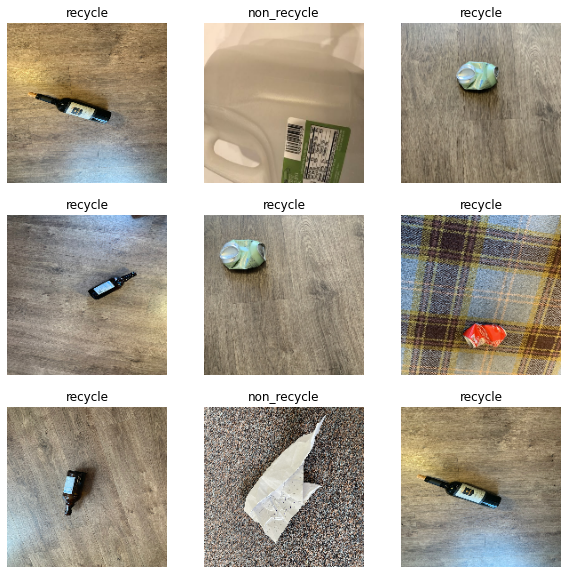

In [ ]:
#Images in the folder

plt.figure(figsize=(10, 10))
for images, labels in new_test_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**Evaluate new test data on model without the data augmentation**

In [ ]:
#Use the model on the new test data and evaluate without augmentation
test_loss, test_acc = resnet_model.evaluate(new_test_dataset) 
print(f"Test accuracy: {test_acc:.2f}")

7/7 [==============================] - 4s 71ms/step - loss: 5.0662 - accuracy: 0.6792
Test accuracy: 0.68


**Evaluate new test data on model with the data augmentation**

In [ ]:
#Use the model on the new test data and evaluate without augmentation
test_loss, test_acc = model.evaluate(new_test_dataset) 
print(f"Test accuracy: {test_acc:.2f}")

7/7 [==============================] - 3s 47ms/step - loss: 2.5155 - accuracy: 0.6934
Test accuracy: 0.69


**Answer:** The model is poor with accuracy with is low.  Giving the new dataset the contrast and brightness is different. When resident take pictures at home they will take it in different lighting and angles. Doing data augmentation with different contrasts should improve the model. 

We have not met our objective of 80-90% accuracy on the new test data for the model to be considered good enough. I believe we can improve the model more given more time. 

**Improve model data augmentation to reflect the new test data**

In [ ]:
from keras.layers import GaussianNoise
import tensorflow as tf
#Test the model on the test datadata_augmentation = keras.Sequential(
data_augmentation_layer = tf.keras.Sequential([                                    
  tf.keras.layers.RandomFlip('horizontal',
         input_shape=(180, 180, 3)),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomWidth(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomContrast(0.2),
  #tf.keras.layers.RandomBrightness(factor=0.2)                                 
], name='data_augmentation')

model=Sequential()
#add data augmentation
model.add(data_augmentation_layer)

#add res50 conv base 
model.add(pretrained_model)
model.add(BatchNormalization())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(632))


model.add(Dense(1,activation="sigmoid"))
#build the model
model.build(input_shape=(None, 180, 180, 3))
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

#Model structure
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequenti  (None, 180, 180, 3)      0         
 al)                                                             
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization_2 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_3 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                      

In [ ]:
# Train the model
epochs=30
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs
)

Epoch 1/30
64/64 [==============================] - 15s 172ms/step - loss: 1.3611 - accuracy: 0.7610 - val_loss: 0.4549 - val_accuracy: 0.8333
Epoch 2/30
64/64 [==============================] - 8s 117ms/step - loss: 0.5900 - accuracy: 0.8148 - val_loss: 0.3633 - val_accuracy: 0.8289
Epoch 3/30
64/64 [==============================] - 7s 111ms/step - loss: 0.3834 - accuracy: 0.8407 - val_loss: 0.2597 - val_accuracy: 0.8991
Epoch 4/30
64/64 [==============================] - 7s 107ms/step - loss: 0.3263 - accuracy: 0.8587 - val_loss: 0.3030 - val_accuracy: 0.8772
Epoch 5/30
64/64 [==============================] - 6s 95ms/step - loss: 0.3328 - accuracy: 0.8592 - val_loss: 0.3021 - val_accuracy: 0.8509
Epoch 6/30
64/64 [==============================] - 6s 93ms/step - loss: 0.3082 - accuracy: 0.8744 - val_loss: 0.2737 - val_accuracy: 0.8728
Epoch 7/30
64/64 [==============================] - 6s 99ms/step - loss: 0.2980 - accuracy: 0.8749 - val_loss: 0.2838 - val_accuracy: 0.8816
Epoch 8/

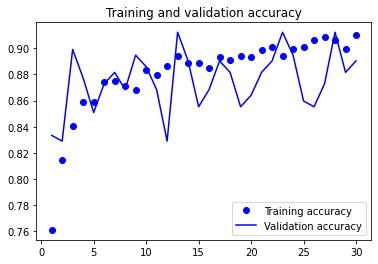

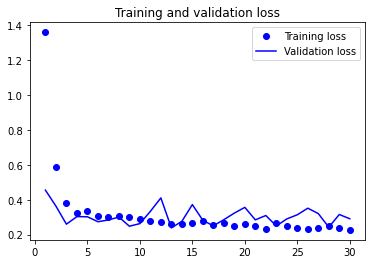

In [ ]:
#training and validation accuracy and loss for the data augumented
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
#Use the model on the new test data and evaluate augmentation
test_loss, test_acc = model.evaluate(new_test_dataset) 
print(f"Test accuracy: {test_acc:.2f}")

#We can see an improve in the model

7/7 [==============================] - 3s 46ms/step - loss: 1.8373 - accuracy: 0.7028
Test accuracy: 0.70


In [ ]:
#Save the latest model
tf.keras.models.save_model(model,'my_model2.h5')

## **Task 4 (HD Task) Build a workable prototype**

Build a web/mobile app that people from your city council can use to determine what to recycle. Test your prototype with the target users and report their feedback.

Upload your code into a GitHub repository.

Create a short video presentation about your product.

---
**END OF ASSIGNMENT TWO**